The main dataset will come from here: https://open.canada.ca/data/en/dataset/d5614095-e77a-4cb4-a5e6-9f8bff067c9f

It has already been downloaded to this repo and is called `32100077.csv`.


In [42]:
import datetime as dt

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

prices_df = pd.read_csv("./data/32100077.csv")

# make some adjustments to the data 
## convert ref_date to datetime data type
prices_df["REF_DATE"] = pd.to_datetime(prices_df["REF_DATE"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m")))
## add a new column that just has year; might be good for grouping later on
prices_df["YEAR"] = prices_df["REF_DATE"].apply(lambda x: x.year)
## convert UOM to category data type
prices_df["UOM"] = prices_df["UOM"].astype("category")
## convert SCALAR_FACTOR to category data type
prices_df["SCALAR_FACTOR"] = prices_df["SCALAR_FACTOR"].astype("category")

In [43]:
# The main dataset displays a time series of prices for different Canadian agricultural products over time.
print(prices_df.shape)
prices_df

(109951, 16)


,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
0,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212166,7.40,170.49,NaN,NaN,t,2,1980
1,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat excluding payments",Dollars per metric tonne,117,units,0,v31212167,7.50,133.74,NaN,NaN,t,2,1980
2,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, durum including payments",Dollars per metric tonne,117,units,0,v31212168,7.60,178.79,NaN,NaN,t,2,1980
3,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, durum excluding payments",Dollars per metric tonne,117,units,0,v31212169,7.70,142.90,NaN,NaN,t,2,1980
4,1980-01-01,Saskatchewan,2016A000247,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212202,8.40,175.79,NaN,NaN,t,2,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109946,2023-09-01,British Columbia,2016A000259,Hogs [111121],Dollars per hundredweight,108,units,0,v31212297,10.37,112.90,NaN,NaN,NaN,2,2023
109947,2023-09-01,British Columbia,2016A000259,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212298,10.38,3.00,NaN,NaN,NaN,2,2023
109948,2023-09-01,British Columbia,2016A000259,Turkeys for meat [111132211],Dollars per kilogram,113,units,0,v31212299,10.39,3.32,NaN,NaN,NaN,2,2023
109949,2023-09-01,British Columbia,2016A000259,Unprocessed milk from bovine [11612111],Dollars per kilolitre,114,units,0,v31212300,10.40,963.89,NaN,NaN,NaN,2,2023


In [44]:


# what is the list of unique farm products?
products = pd.Series(prices_df["Farm products"].sort_values().unique(), name="products")
products

0                                      Barley [1151141]
1                    Barley for animal feed [115114111]
2     Barley for malt and other human consumption [1...
3                         Calves for feeding [11111122]
4                      Calves for slaughter [111111211]
5       Canadian Wheat Board, barley excluding payments
6       Canadian Wheat Board, barley including payments
7        Canadian Wheat Board, durum excluding payments
8        Canadian Wheat Board, durum including payments
9     Canadian Wheat Board, selected barley excludin...
10    Canadian Wheat Board, selected barley includin...
11       Canadian Wheat Board, wheat excluding payments
12       Canadian Wheat Board, wheat including payments
13                              Canary seeds [11511555]
14                 Canola (including rapeseed) [113111]
15                        Cattle for feeding [11111112]
16                      Cattle for slaughter [11111111]
17                         Chickens for meat [11

In [45]:
# create a functon for plotting a time series

def _plot_time_series(var):
    mask = prices_df["Farm products"] == var
    sub_prices_df = prices_df.where(mask).dropna(subset=["Farm products"])
    sns.lineplot(data=sub_prices_df, x="REF_DATE", y="VALUE", hue="GEO"
                 )
    plt.title(f"Time Series of Prices for {var.split(' [')[0]}")
    plt.xlabel("Date")
    plt.ylabel(sub_prices_df["UOM"].iloc[0])


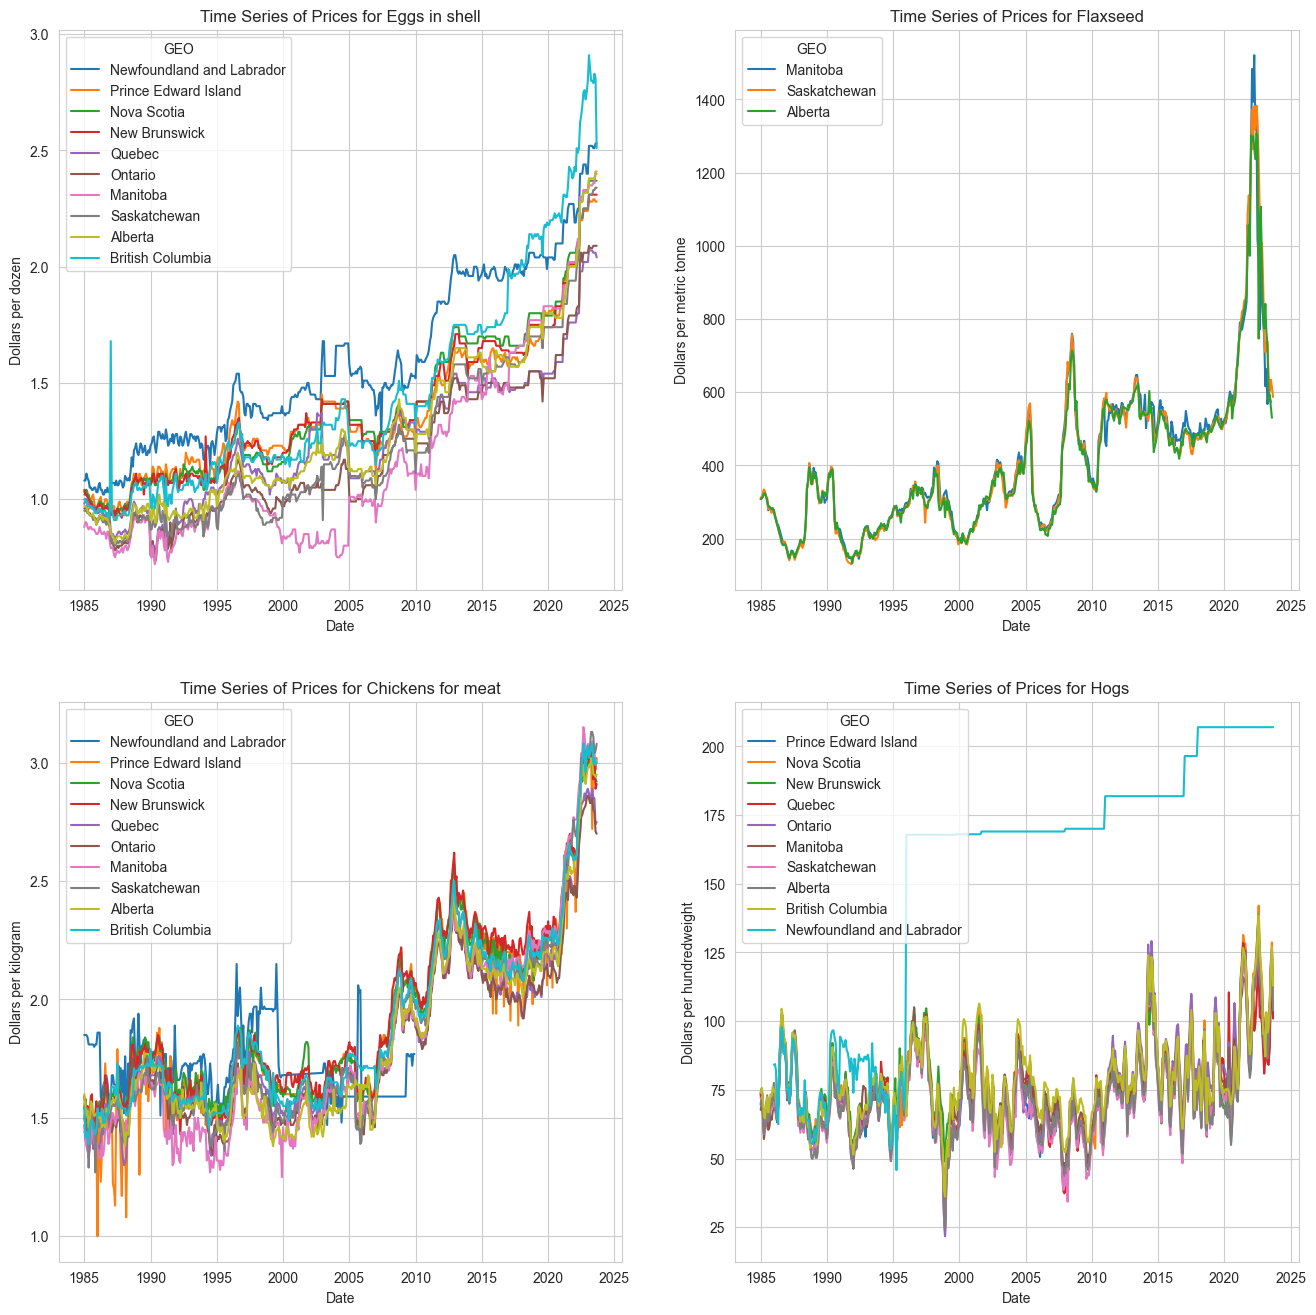

In [46]:
plt.figure(figsize=(16, 16))

# let's focus in on eggs in shell production in Canada
plt.subplot(2, 2, 1)
_plot_time_series("Eggs in shell [116111]")
plt.subplot(2, 2, 2)
_plot_time_series("Flaxseed [115122111]")
plt.subplot(2, 2, 3)
_plot_time_series("Chickens for meat [11113131]")
plt.subplot(2, 2, 4)
_plot_time_series("Hogs [111121]")


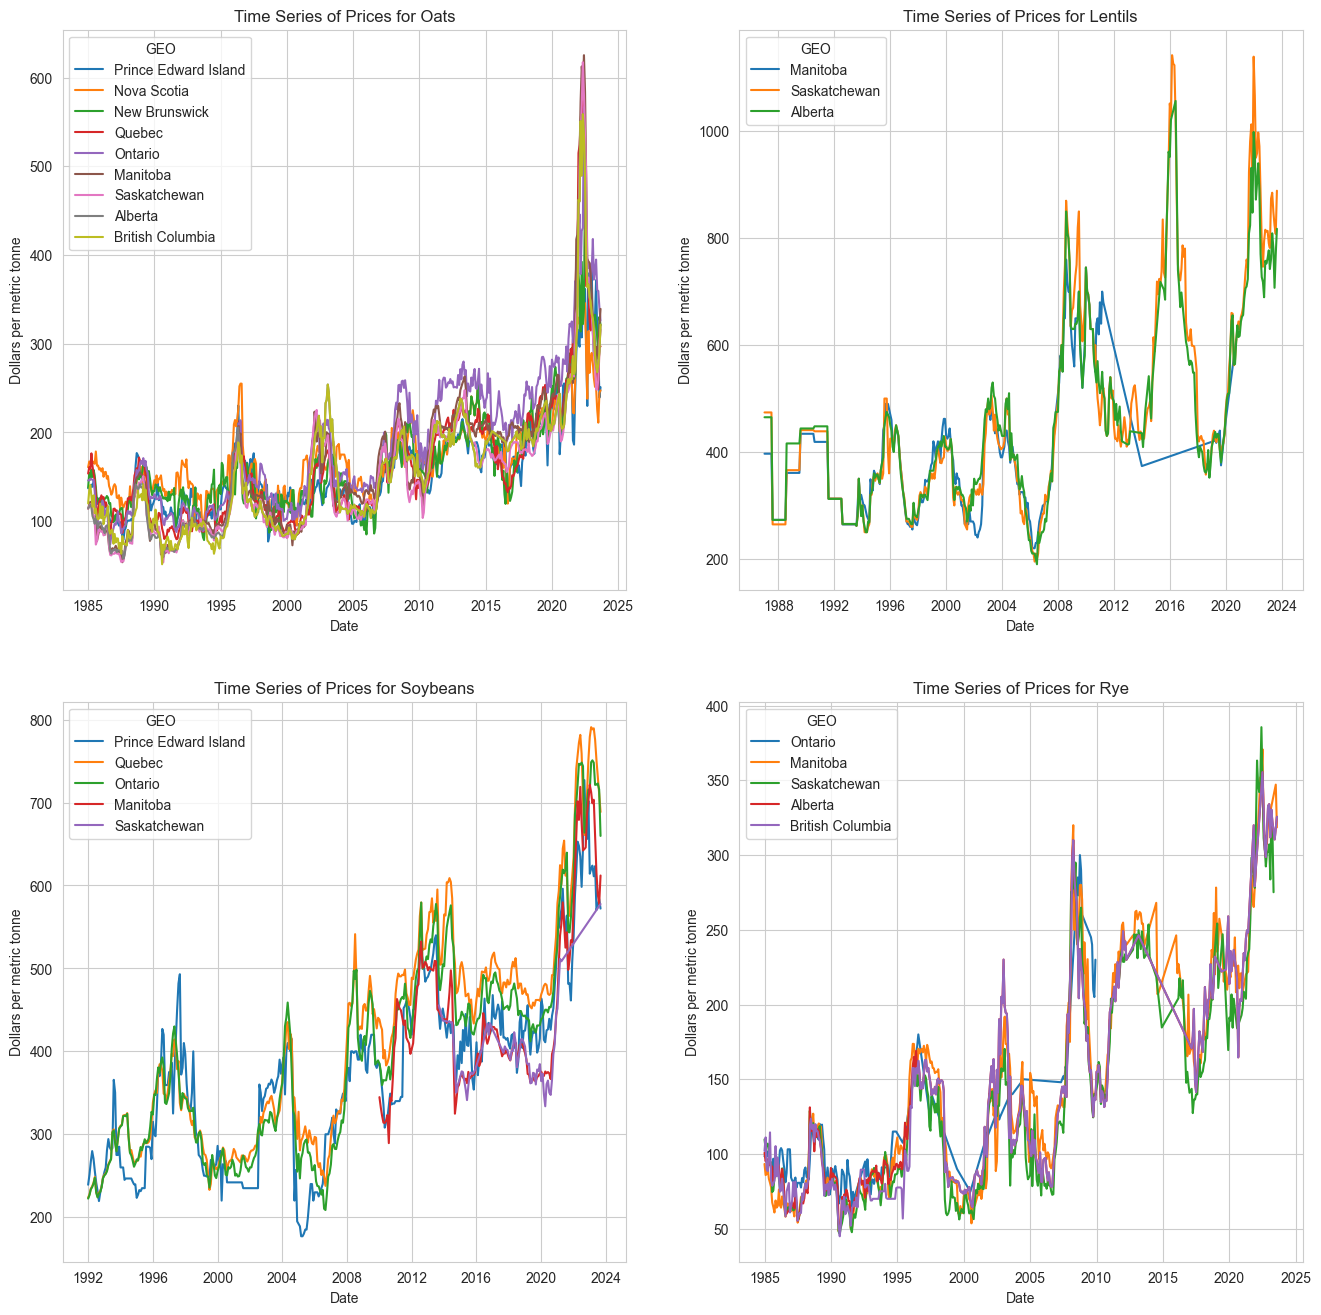

In [47]:
plt.figure(figsize=(16, 16))

# let's focus in on eggs in shell production in Canada
plt.subplot(2, 2, 1)
_plot_time_series("Oats [115113111]")
plt.subplot(2, 2, 2)
_plot_time_series("Lentils [114312]")
plt.subplot(2, 2, 3)
_plot_time_series("Soybeans [1151211]")
plt.subplot(2, 2, 4)
_plot_time_series("Rye [1151152]")


# A focus on chickens


<Axes: title={'center': 'Mean Birds per Farm in Canada (1951-2021)'}, xlabel='Date', ylabel='Number of birds per farm'>

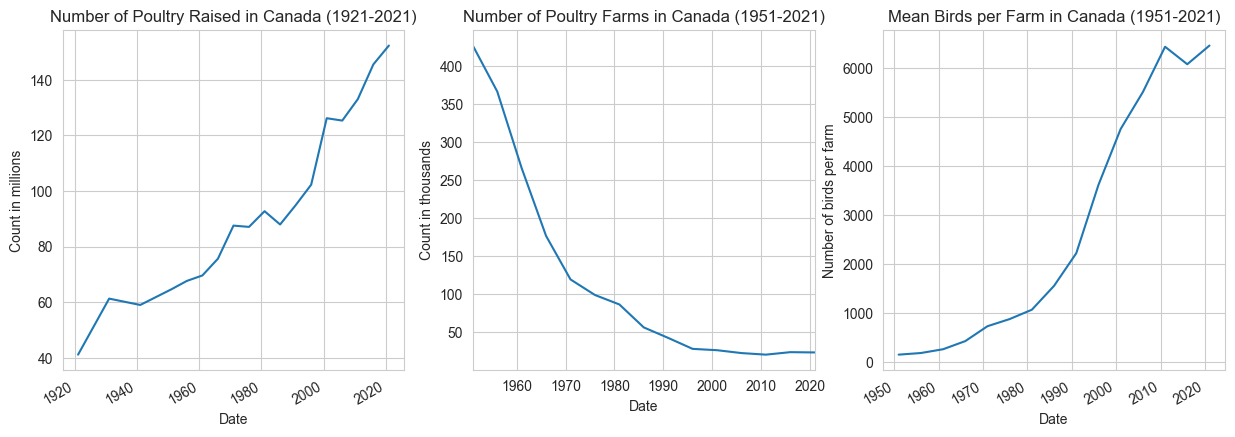

In [81]:
# from https://open.canada.ca/data/en/dataset/fa6077cb-b908-42e6-963e-5f09d32c2eea

# This will be the response variable
df_raw = pd.read_csv("./data/32100155.csv")
# convert the year to a datetime obj
df_raw["REF_DATE"] = pd.to_datetime(df_raw["REF_DATE"].apply(lambda x: dt.datetime.strptime(str(x), "%Y")))

# look at the national total
df_canada = df_raw[df_raw["GEO"] == "Canada"].dropna(subset=["VALUE"])
# look at only chickens
df_chickens = df_canada[df_canada["Selected livestock"] == "Total hens and chickens"]

df_chickens_count = df_chickens[df_chickens["Unit of measure"] == "Number of animals"][["VALUE", "REF_DATE", "Unit of measure"]]
df_chickens_farms = df_chickens[df_chickens["Unit of measure"] == "Number of farms reporting"][["VALUE", "REF_DATE", "Unit of measure"]]

ser_chicken_count = pd.Series(data=df_chickens_count["VALUE"].values, index=df_chickens_count["REF_DATE"], name="counts")
ser_chicken_farms = pd.Series(df_chickens_farms["VALUE"].values, index=df_chickens_farms["REF_DATE"], name="counts")
ser_chicken_per_farms = ser_chicken_count / ser_chicken_farms
ser_chicken_count = ser_chicken_count / 1e6
ser_chicken_farms = ser_chicken_farms / 1e3

plt.figure(figsize=(15, 5))
# chicken count
plt.subplot(1, 3, 1)
labels = dict(
    xlabel="Date",
    ylabel="Count in millions",
    title=f"Number of Poultry Raised in Canada ({ser_chicken_count.index.min().year}-{ser_chicken_count.index.max().year})"
)
ser_chicken_count.plot(**labels)

# farm count
plt.subplot(1, 3, 2)
labels["ylabel"] = "Count in thousands"
labels["title"] = f"Number of Poultry Farms in Canada ({ser_chicken_farms.index.min().year}-{ser_chicken_farms.index.max().year})"
ser_chicken_farms.plot(**labels)

# average birds / farm
plt.subplot(1, 3, 3)
labels["ylabel"] = "Number of birds per farm"
labels["title"] = f"Mean Birds per Farm in Canada ({ser_chicken_farms.index.min().year}-{ser_chicken_farms.index.max().year})"
ser_chicken_per_farms.plot(**labels)



### This is really interesting. It seems like the total number of farms has shrunk, despite solid growth in the number of chickens raised

Now I would like to explore the relationship between:

- number of birds vs. price
- number of birds per farm vs. price

In [82]:
# Now let's get the prices on chicken for the same time period
mask = products.str.lower().str.contains("eggs") | products.str.lower().str.contains("chicken")
products[mask]



17    Chickens for meat [11113131]
22          Eggs in shell [116111]
Name: products, dtype: object

In [83]:

# let's start with just meat
mask = (prices_df["Farm products"] == "Chickens for meat [11113131]") & (prices_df["VALUE"].notnull())
chicken_prices_df = prices_df[mask]
# make sure we are only dealing with a single category for UoM and Scale
print(chicken_prices_df["UOM"].unique())
print(chicken_prices_df["SCALAR_FACTOR"].unique())
# view the DF
chicken_prices_df

['Dollars per kilogram']
Categories (5, object): ['Dollars per dozen', 'Dollars per hundredweight', 'Dollars per kilogram', 'Dollars per kilolitre', 'Dollars per metric tonne']
['units']
Categories (1, object): ['units']


,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
1156,1985-01-01,Newfoundland and Labrador,2016A000210,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212056,1.38,1.85,NaN,NaN,NaN,2,1985
1166,1985-01-01,Prince Edward Island,2016A000211,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212075,2.38,1.54,NaN,NaN,NaN,2,1985
1176,1985-01-01,Nova Scotia,2016A000212,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212093,3.38,1.54,NaN,NaN,NaN,2,1985
1187,1985-01-01,New Brunswick,2016A000213,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212112,4.38,1.59,NaN,NaN,NaN,2,1985
1199,1985-01-01,Quebec,2016A000224,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212136,5.38,1.47,NaN,NaN,NaN,2,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109820,2023-09-01,Ontario,2016A000235,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212162,6.38,2.70,NaN,NaN,NaN,2,2023
109853,2023-09-01,Manitoba,2016A000246,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212198,7.38,3.01,NaN,NaN,NaN,2,2023
109886,2023-09-01,Saskatchewan,2016A000247,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212234,8.38,3.08,NaN,NaN,NaN,2,2023
109919,2023-09-01,Alberta,2016A000248,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212270,9.38,2.95,NaN,NaN,NaN,2,2023


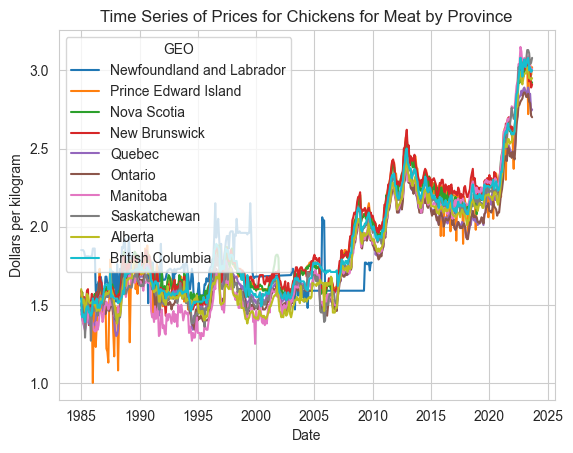

In [84]:
def _plot_time_series_from_df(df, x, y, z, product_name):
    sns.lineplot(data=df, x=x, y=y, hue=z)
    plt.title(f"Time Series of Prices for {product_name}")
    plt.xlabel("Date")
    plt.ylabel(df["UOM"].iloc[0])


_plot_time_series_from_df(chicken_prices_df, "REF_DATE", "VALUE", "GEO", "Chickens for Meat by Province")


### Newfoundland looks a little sketch... Something different is going on there obviously

Remove Newfoundland



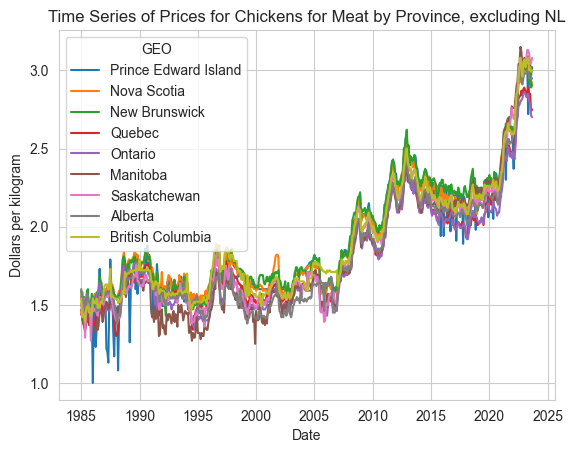

In [85]:
mask = (chicken_prices_df["GEO"] != "Newfoundland and Labrador")
chicken_prices_df = chicken_prices_df[mask]
_plot_time_series_from_df(chicken_prices_df, "REF_DATE", "VALUE", "GEO", "Chickens for Meat by Province, excluding NL")



### But now we should be dealing with a combined variable for all of canada

Will use groupby / aggregation

In [86]:
chicken_prices_df.groupby("YEAR")["VALUE"].mean()
# convert to time series
ser_chicken_prices = pd.Series(
    data=chicken_prices_df.groupby("YEAR")["VALUE"].mean(numeric_only=True).values,
    index=chicken_prices_df.groupby("YEAR").mean(numeric_only=True).index.to_series().apply(lambda x: dt.datetime.strptime(str(x), "%Y")),
    name="prices"
)
ser_chicken_prices

YEAR
1985-01-01    1.459167
1986-01-01    1.503981
1987-01-01    1.524352
1988-01-01    1.569167
1989-01-01    1.707870
1990-01-01    1.718426
1991-01-01    1.576019
1992-01-01    1.545926
1993-01-01    1.576667
1994-01-01    1.492130
1995-01-01    1.473796
1996-01-01    1.693056
1997-01-01    1.698056
1998-01-01    1.649259
1999-01-01    1.540000
2000-01-01    1.523958
2001-01-01    1.614062
2002-01-01    1.533542
2003-01-01    1.621574
2004-01-01    1.661019
2005-01-01    1.633981
2006-01-01    1.578889
2007-01-01    1.731574
2008-01-01    1.965093
2009-01-01    2.000833
2010-01-01    1.922963
2011-01-01    2.197407
2012-01-01    2.285185
2013-01-01    2.326574
2014-01-01    2.220278
2015-01-01    2.161204
2016-01-01    2.136944
2017-01-01    2.111574
2018-01-01    2.138889
2019-01-01    2.183889
2020-01-01    2.235093
2021-01-01    2.529907
2022-01-01    2.820000
2023-01-01    2.970370
Name: prices, dtype: float64

<Axes: title={'center': 'Price of Chicken Meat in Canada (1985-2023)'}, xlabel='Date', ylabel='Dollars per kilogram'>

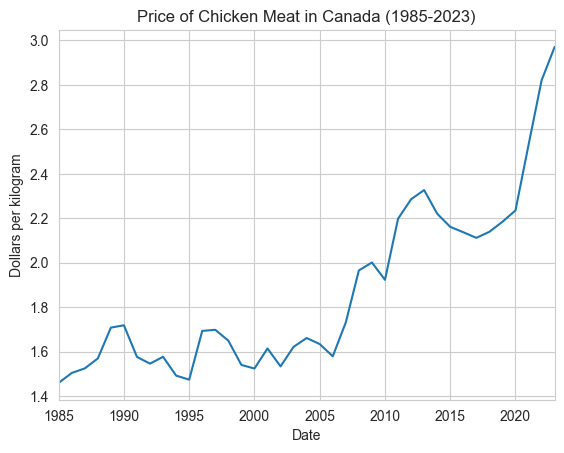

In [87]:
labels["ylabel"] = "Dollars per kilogram"
labels["title"] = f"Price of Chicken Meat in Canada ({ser_chicken_prices.index.min().year}-{ser_chicken_prices.index.max().year})"
ser_chicken_prices.plot(**labels)

In [106]:
new_df = pd.DataFrame(data={"prices": ser_chicken_prices})
final_df = new_df.join(ser_chicken_count).dropna()
final_df['Eins'] = np.ones((len(final_df), ))
final_df



,prices,counts,Eins
YEAR,,,
1986-01-01,1.503981,87.942244,1.0
1991-01-01,1.576019,94.872875,1.0
1996-01-01,1.693056,102.255149,1.0
2001-01-01,1.614062,126.159529,1.0
2006-01-01,1.578889,125.314793,1.0
2011-01-01,2.197407,133.025153,1.0
2016-01-01,2.136944,145.519566,1.0
2021-01-01,2.529907,152.299258,1.0


Text(0.5, 1.0, 'Effect of prices on number of chickens raised')

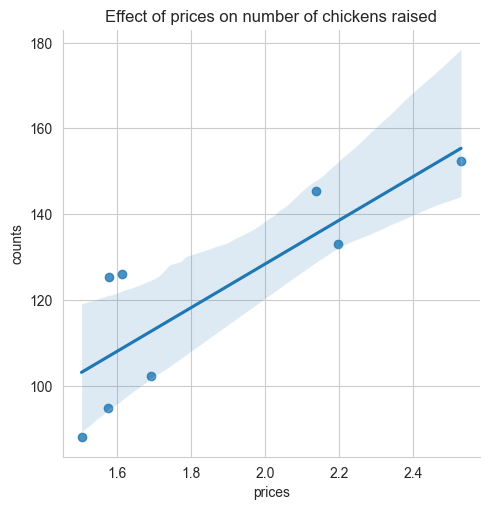

In [89]:
sns.lmplot(data=final_df, x="prices", y="counts")
plt.title("Effect of prices on number of chickens raised")

In [107]:


Y = final_df["counts"]
X = final_df[['prices','Eins']]
results = sm.OLS( Y, X).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     12.47
Date:                Sat, 09 Dec 2023   Prob (F-statistic):             0.0124
Time:                        11:11:04   Log-Likelihood:                -31.609
No. Observations:                   8   AIC:                             67.22
Df Residuals:                       6   BIC:                             67.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
prices        50.9459     14.428      3.531      0.0

C:\Users\fishmand\Projects\watspeed_root\venv0\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [57]:

import math

final_df = new_df.join(ser_chicken_per_farms).dropna()
final_df["log_prices"] = final_df["prices"].apply(lambda x: math.log(x))

Text(0.5, 1.0, 'Effect of prices on number of chickens per farm')

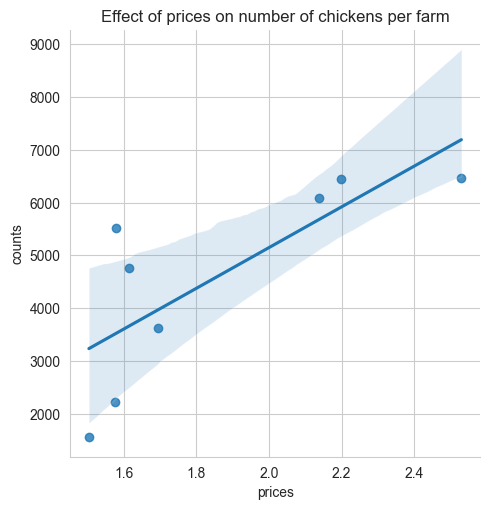

In [58]:

sns.lmplot(data=final_df, x="prices", y="counts")
plt.title("Effect of prices on number of chickens per farm")


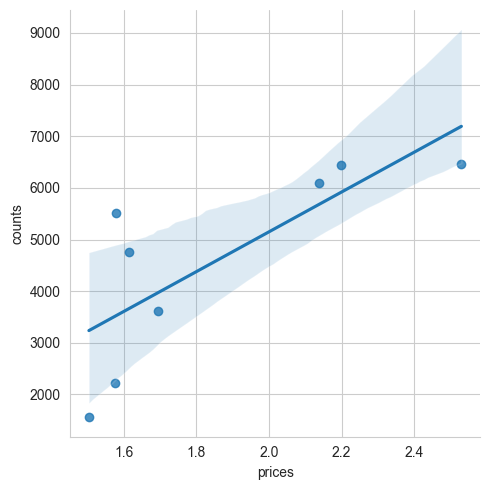

In [59]:
sns.lmplot(data=final_df, x="prices", y="counts")


# OK, let's do everything over again but with swine 

In [91]:
mask = products.str.lower().str.contains("swine") | products.str.lower().str.contains("hog") | products.str.lower().str.contains("pig")
print(products[mask])
# let's start with just meat
mask = (prices_df["Farm products"] == "Hogs [111121]") & (prices_df["VALUE"].notnull())
hog_prices_df = prices_df[mask]
# make sure we are only dealing with a single category for UoM and Scale
print(hog_prices_df["UOM"].unique())
print(hog_prices_df["SCALAR_FACTOR"].unique())
# view the DF
hog_prices_df



30    Hogs [111121]
Name: products, dtype: object
['Dollars per hundredweight']
Categories (5, object): ['Dollars per dozen', 'Dollars per hundredweight', 'Dollars per kilogram', 'Dollars per kilolitre', 'Dollars per metric tonne']
['units']
Categories (1, object): ['units']


,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
1165,1985-01-01,Prince Edward Island,2016A000211,Hogs [111121],Dollars per hundredweight,108,units,0,v31212074,2.37,73.33,NaN,NaN,NaN,2,1985
1175,1985-01-01,Nova Scotia,2016A000212,Hogs [111121],Dollars per hundredweight,108,units,0,v31212092,3.37,72.98,NaN,NaN,NaN,2,1985
1186,1985-01-01,New Brunswick,2016A000213,Hogs [111121],Dollars per hundredweight,108,units,0,v31212111,4.37,73.31,NaN,NaN,NaN,2,1985
1198,1985-01-01,Quebec,2016A000224,Hogs [111121],Dollars per hundredweight,108,units,0,v31212135,5.37,72.18,NaN,NaN,NaN,2,1985
1214,1985-01-01,Ontario,2016A000235,Hogs [111121],Dollars per hundredweight,108,units,0,v31212161,6.37,73.99,NaN,NaN,NaN,2,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109819,2023-09-01,Ontario,2016A000235,Hogs [111121],Dollars per hundredweight,108,units,0,v31212161,6.37,111.98,NaN,NaN,NaN,2,2023
109852,2023-09-01,Manitoba,2016A000246,Hogs [111121],Dollars per hundredweight,108,units,0,v31212197,7.37,106.90,NaN,NaN,NaN,2,2023
109885,2023-09-01,Saskatchewan,2016A000247,Hogs [111121],Dollars per hundredweight,108,units,0,v31212233,8.37,106.32,NaN,NaN,NaN,2,2023
109918,2023-09-01,Alberta,2016A000248,Hogs [111121],Dollars per hundredweight,108,units,0,v31212269,9.37,103.96,NaN,NaN,NaN,2,2023


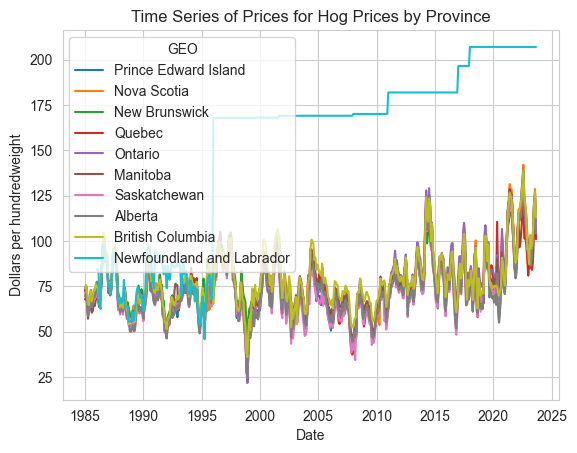

In [92]:

_plot_time_series_from_df(hog_prices_df, "REF_DATE", "VALUE", "GEO", "Hog Prices by Province")


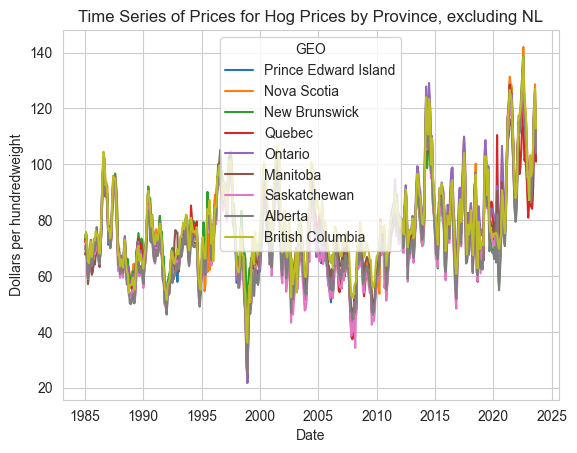

In [93]:
### again, NL is an outlier.. we should remove them
mask = (hog_prices_df["GEO"] != "Newfoundland and Labrador")
hog_prices_df = hog_prices_df[mask]
_plot_time_series_from_df(hog_prices_df, "REF_DATE", "VALUE", "GEO", "Hog Prices by Province, excluding NL")


In [94]:
# aggregate over all of canada

hog_prices_df.groupby("YEAR")["VALUE"].mean()
# convert to time series
ser_hog_prices = pd.Series(
    data=hog_prices_df.groupby("YEAR")["VALUE"].mean(numeric_only=True).values,
    index=hog_prices_df.groupby("YEAR").mean(numeric_only=True).index.to_series().apply(lambda x: dt.datetime.strptime(str(x), "%Y")),
    name="prices"
)
# the above is in CAD/hundredweight and should be converted to CAD/kilogram: 1 hundredweight = 45.36 kg
ser_hog_prices = ser_hog_prices / 45.36
ser_hog_prices

YEAR
1985-01-01    1.505987
1986-01-01    1.820792
1987-01-01    1.767384
1988-01-01    1.375982
1989-01-01    1.384194
1990-01-01    1.655650
1991-01-01    1.487789
1992-01-01    1.358341
1993-01-01    1.586261
1994-01-01    1.523834
1995-01-01    1.570226
1996-01-01    1.956855
1997-01-01    1.945006
1998-01-01    1.278276
1999-01-01    1.306025
2000-01-01    1.735680
2001-01-01    1.843713
2002-01-01    1.445963
2003-01-01    1.433179
2004-01-01    1.736430
2005-01-01    1.573754
2006-01-01    1.384937
2007-01-01    1.327377
2008-01-01    1.323135
2009-01-01    1.257722
2010-01-01    1.471251
2011-01-01    1.722722
2012-01-01    1.670480
2013-01-01    1.788525
2014-01-01    2.236934
2015-01-01    1.744650
2016-01-01    1.688127
2017-01-01    1.826422
2018-01-01    1.671382
2019-01-01    1.817960
2020-01-01    1.695612
2021-01-01    2.299613
2022-01-01    2.469021
2023-01-01    2.230042
Name: prices, dtype: float64

<Axes: title={'center': 'Price of Hogs in Canada (1985-2023)'}, xlabel='Date', ylabel='Dollars per kilogram'>

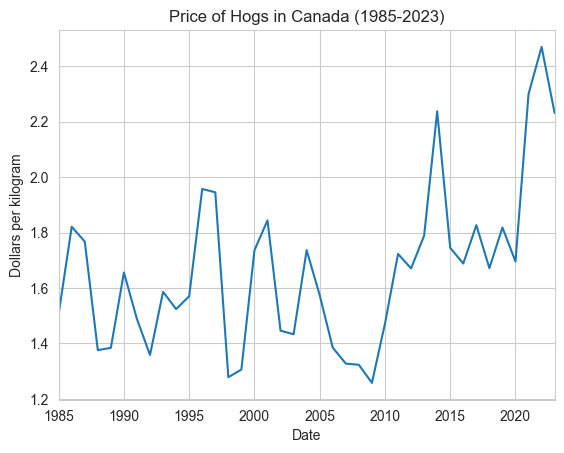

In [95]:
labels["ylabel"] = "Dollars per kilogram"
labels["title"] = f"Price of Hogs in Canada ({ser_hog_prices.index.min().year}-{ser_hog_prices.index.max().year})"
ser_hog_prices.plot(**labels)

In [96]:
# now we have to find a swine production dataset
# from https://open.canada.ca/data/en/dataset/28a34385-92a2-4934-8899-2cc85fcc4786

# This will be the response variable
df_raw = pd.read_csv("./data/32100126.csv")
# convert the year to a datetime obj
df_raw["REF_DATE"] = pd.to_datetime(df_raw["REF_DATE"].apply(lambda x: dt.datetime.strptime(str(x), "%Y")))

mask = ((df_raw["Estimates"] == "Estimated farm output") & (df_raw["Livestock"] == "Hogs"))
df_hogs_count = df_raw[mask]
ser_hogs_count = pd.Series(data=df_hogs_count["VALUE"].values, index=df_hogs_count["REF_DATE"], name="counts")
ser_hogs_count = ser_hogs_count*1e3/1e6
ser_hogs_count


REF_DATE
1920-01-01     3.3026
1921-01-01     3.1600
1922-01-01     3.6200
1923-01-01     3.9750
1924-01-01     4.7400
               ...   
2018-01-01    26.8263
2019-01-01    26.9489
2020-01-01    28.0270
2021-01-01    28.6480
2022-01-01    28.3030
Name: counts, Length: 103, dtype: float64

<Axes: title={'center': 'Number of Hogs Output in Canada (1920-2022)'}, xlabel='Date', ylabel='Millions of heads'>

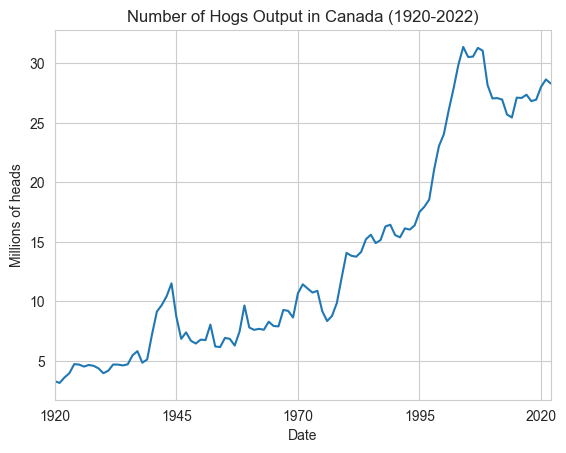

In [97]:

labels = dict(
    xlabel="Date", 
    ylabel="Millions of heads",
    title=f"Number of Hogs Output in Canada ({ser_hogs_count.index.min().year}-{ser_hogs_count.index.max().year})"
)
ser_hogs_count.plot(**labels)

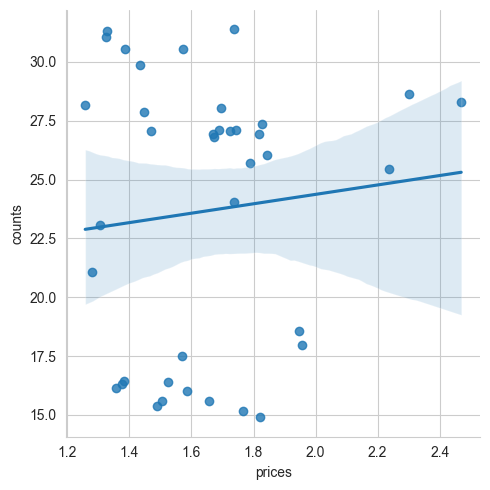

In [99]:
sns.lmplot(data=final_df, x="prices", y="counts")

In [104]:
final_df = pd.DataFrame(data={"prices": ser_hog_prices}).join(ser_hogs_count).dropna()
final_df['Eins'] = np.ones((len(final_df), ))

final_df

,prices,counts,Eins
YEAR,,,
1985-01-01,1.505987,15.6044,1.0
1986-01-01,1.820792,14.9009,1.0
1987-01-01,1.767384,15.1622,1.0
1988-01-01,1.375982,16.3037,1.0
1989-01-01,1.384194,16.4450,1.0
1990-01-01,1.655650,15.5740,1.0
1991-01-01,1.487789,15.3878,1.0
1992-01-01,1.358341,16.1390,1.0
1993-01-01,1.586261,16.0400,1.0


                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.3441
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.561
Time:                        11:08:54   Log-Likelihood:                -119.97
No. Observations:                  38   AIC:                             243.9
Df Residuals:                      36   BIC:                             247.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
prices         2.0010      3.411      0.587      0.5

ValueError: x and y must be the same size

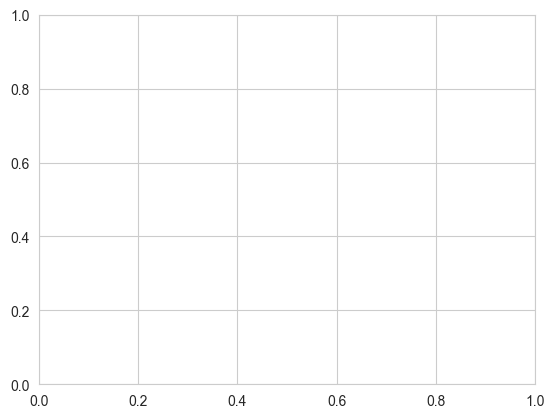

In [105]:
Y = final_df["counts"]
X = final_df[['prices','Eins']]
results = sm.OLS( Y, X).fit()
print(results.summary())


# finally let's look at a grain... These crops might be more responsive to fluctuations in price?

In [69]:
mask = products.str.lower().str.contains("wheat")
print(products[mask])
# let's start with just meat
mask = (prices_df["Farm products"] == "Wheat (except durum wheat) [1121111]") & (prices_df["VALUE"].notnull())
grain_prices_df = prices_df[mask]
grain_prices_df

5       Canadian Wheat Board, barley excluding payments
6       Canadian Wheat Board, barley including payments
7        Canadian Wheat Board, durum excluding payments
8        Canadian Wheat Board, durum including payments
9     Canadian Wheat Board, selected barley excludin...
10    Canadian Wheat Board, selected barley includin...
11       Canadian Wheat Board, wheat excluding payments
12       Canadian Wheat Board, wheat including payments
21                              Durum wheat [112111211]
33                 Non-board wheat (except durum wheat)
35                     Ontario wheat excluding payments
36                     Ontario wheat including payments
43                 Wheat (except durum wheat) [1121111]
44                  Wheat (except durum wheat), milling
45                    Wheat (except durum wheat), other
Name: products, dtype: object


,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
15534,1992-01-01,Prince Edward Island,2016A000211,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v31212059,2.3,144.57,NaN,NaN,NaN,2,1992
15550,1992-01-01,Nova Scotia,2016A000212,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v31212078,3.3,152.13,NaN,NaN,NaN,2,1992
15566,1992-01-01,New Brunswick,2016A000213,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v31212097,4.3,129.46,NaN,NaN,NaN,2,1992
15582,1992-01-01,Quebec,2016A000224,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v31212116,5.3,128.58,NaN,NaN,NaN,2,1992
15753,1992-02-01,Prince Edward Island,2016A000211,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v31212059,2.3,146.40,NaN,NaN,NaN,2,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109774,2023-09-01,Quebec,2016A000224,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v31212116,5.3,354.09,NaN,NaN,NaN,2,2023
109824,2023-09-01,Manitoba,2016A000246,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v87007862,7.3,366.32,NaN,NaN,NaN,2,2023
109857,2023-09-01,Saskatchewan,2016A000247,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v87007867,8.3,361.11,NaN,NaN,NaN,2,2023
109890,2023-09-01,Alberta,2016A000248,Wheat (except durum wheat) [1121111],Dollars per metric tonne,117,units,0,v87007874,9.3,367.78,NaN,NaN,NaN,2,2023


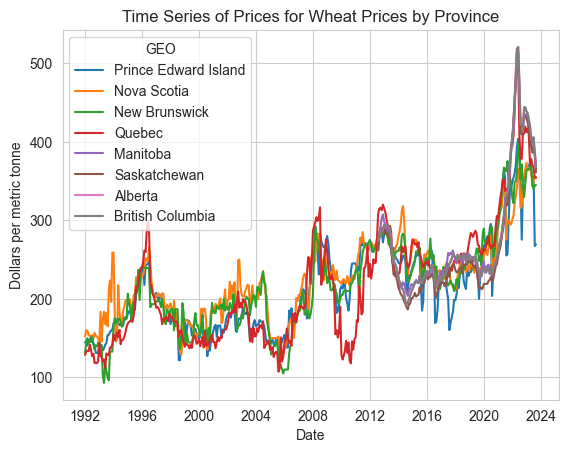

In [70]:
_plot_time_series_from_df(grain_prices_df, "REF_DATE", "VALUE", "GEO", "Wheat Prices by Province")


In [71]:

grain_prices_df.groupby("YEAR")["VALUE"].mean()
# convert to time series
ser_grain_prices = pd.Series(
    data=grain_prices_df.groupby("YEAR")["VALUE"].mean(numeric_only=True).values,
    index=grain_prices_df.groupby("YEAR").mean(numeric_only=True).index.to_series().apply(lambda x: dt.datetime.strptime(str(x), "%Y")),
    name="prices"
)
# the above is in CAD/hundredweight and should be converted to CAD/kilogram: 1 hundredweight = 45.36 kg
ser_grain_prices

YEAR
1992-01-01    141.787500
1993-01-01    145.796667
1994-01-01    170.302500
1995-01-01    201.762292
1996-01-01    230.606042
1997-01-01    188.970208
1998-01-01    165.936667
1999-01-01    156.016875
2000-01-01    156.772500
2001-01-01    172.838333
2002-01-01    189.052500
2003-01-01    186.859375
2004-01-01    181.151875
2005-01-01    136.585417
2006-01-01    158.150208
2007-01-01    205.249375
2008-01-01    262.575833
2009-01-01    217.153333
2010-01-01    197.267500
2011-01-01    244.860208
2012-01-01    277.219412
2013-01-01    268.872187
2014-01-01    230.443021
2015-01-01    235.378958
2016-01-01    231.771146
2017-01-01    230.982604
2018-01-01    243.167187
2019-01-01    245.453125
2020-01-01    252.840833
2021-01-01    320.215208
2022-01-01    409.101771
2023-01-01    382.844861
Name: prices, dtype: float64

<Axes: title={'center': 'Price of Wheat in Canada (1992-2023)'}, xlabel='Date', ylabel='Dollars per metric ton'>

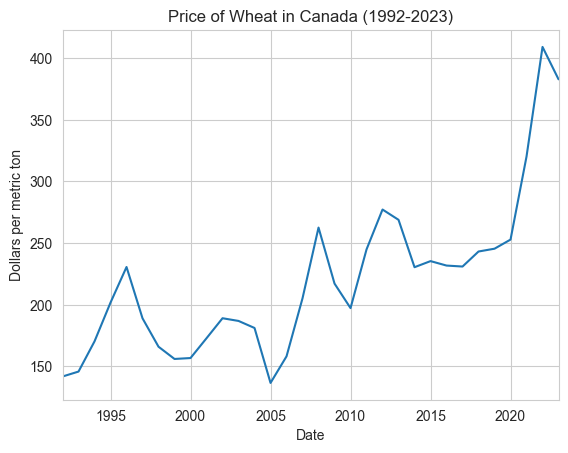

In [72]:
labels["ylabel"] = "Dollars per metric ton"
labels["title"] = f"Price of Wheat in Canada ({ser_grain_prices.index.min().year}-{ser_grain_prices.index.max().year})"
ser_grain_prices.plot(**labels)

In [73]:
# now we have to find a oat production dataset
# from https://open.canada.ca/data/en/dataset/dd8ffdfb-d9fb-4f16-be28-50632a64d95c

# This will be the response variable
df_raw = pd.read_csv("./data/32100015.csv")
# convert the year to a datetime obj
df_raw["REF_DATE"] = pd.to_datetime(df_raw["REF_DATE"].apply(lambda x: dt.datetime.strptime(str(x), "%Y-%m")))
df_raw["YEAR"] = df_raw["REF_DATE"].apply(lambda x: x.year)
df_raw["MONTH"] = df_raw["REF_DATE"].apply(lambda x: x.month)

# df_raw

mask = df_raw["Type of crop"].str.lower().str.contains("wheat")
print(df_raw["Type of crop"][mask].unique())

mask = ((df_raw["Type of crop"] == "Wheat, excluding durum") & (df_raw["Farm supply and disposition of grains"] == "Production") & (df_raw["GEO"] == "Canada") & (df_raw["MONTH"] == 12))
df_grain_count = df_raw[mask]

# df_grain_count_grouped = df_grain_count.groupby("YEAR").first()
# df_grain_count_grouped
ser_grain_prod = pd.Series(data=df_grain_count["VALUE"].values, index=df_grain_count["REF_DATE"], name="production")
# # ser_hogs_count = ser_hogs_count*1e3/1e6
ser_grain_prod


['All wheat' 'Durum wheat' 'Wheat, excluding durum']


REF_DATE
2001-12-01    17580.7
2002-12-01    12084.4
2003-12-01    18837.0
2004-12-01    19994.1
2005-12-01    19833.5
2006-12-01    21919.2
2007-12-01    16409.0
2008-12-01    23099.9
2009-12-01    21550.3
2010-12-01    20274.9
2011-12-01    21115.9
2012-12-01    22619.4
2013-12-01    31084.6
2014-12-01    24249.4
2015-12-01    22258.7
2016-12-01    24378.1
2017-12-01    25415.1
2018-12-01    26567.1
2019-12-01    27652.8
2020-12-01    28866.0
2021-12-01    19389.7
2022-12-01    28545.2
Name: production, dtype: float64

<Axes: title={'center': 'Production of Wheat in Canada (2001-2022)'}, xlabel='Date', ylabel='Thousands of metric tonnes'>

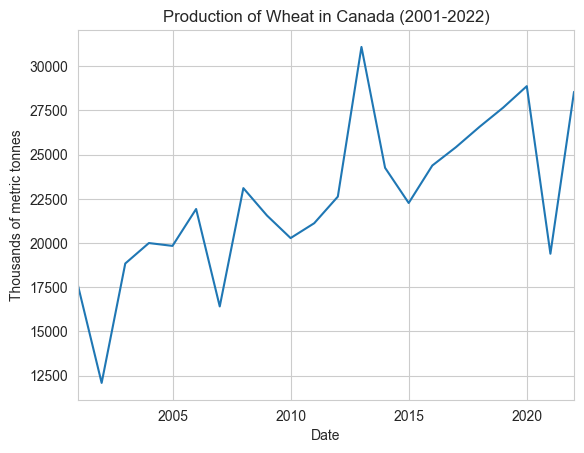

In [74]:

labels = dict(
    xlabel="Date", 
    ylabel="Thousands of metric tonnes",
    title=f"Production of Wheat in Canada ({ser_grain_prod.index.min().year}-{ser_grain_prod.index.max().year})"
)
ser_grain_prod.plot(**labels)

In [75]:
final_df = pd.DataFrame(data={"prices": ser_grain_prices}).join(ser_grain_prod).dropna()
final_df

,prices,production
YEAR,,


In [76]:
ser_grain_prod = ser_grain_prod.resample("YS").first()
# ser_grain_prod = ser_grain_prod.shift(-1)

In [108]:
final_df = pd.DataFrame(data={"prices": ser_grain_prices}).join(ser_grain_prod).dropna()
final_df['Eins'] = np.ones((len(final_df), ))
final_df

,prices,production,Eins
YEAR,,,
2001-01-01,172.838333,17580.7,1.0
2002-01-01,189.052500,12084.4,1.0
2003-01-01,186.859375,18837.0,1.0
2004-01-01,181.151875,19994.1,1.0
2005-01-01,136.585417,19833.5,1.0
2006-01-01,158.150208,21919.2,1.0
2007-01-01,205.249375,16409.0,1.0
2008-01-01,262.575833,23099.9,1.0
2009-01-01,217.153333,21550.3,1.0


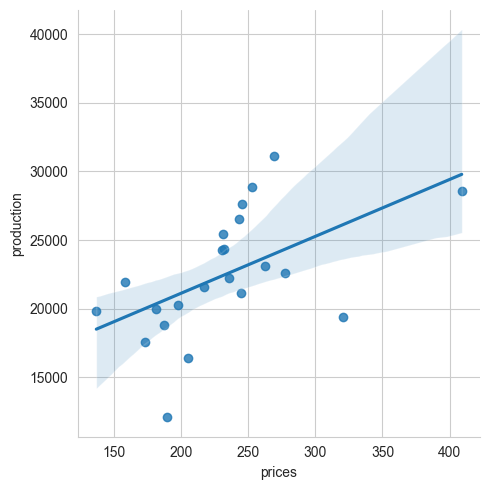

In [78]:
sns.lmplot(data=final_df, x="prices", y="production")

In [110]:


Y = final_df["production"]
X = final_df[['prices','Eins']]
results = sm.OLS( Y, X).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     8.065
Date:                Sat, 09 Dec 2023   Prob (F-statistic):             0.0101
Time:                        11:14:27   Log-Likelihood:                -212.00
No. Observations:                  22   AIC:                             428.0
Df Residuals:                      20   BIC:                             430.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
prices        41.3883     14.574      2.840      0.0